In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import MetaData

from rlmolecule.sql import Base, Session
from rlmolecule.sql.tables import GameStore, RewardStore, StateStore

%matplotlib inline

In [9]:
run_id = "gridworld_16"

dbname = "bde"
port = "5432"
host = "yuma.hpc.nrel.gov"
user = "rlops"
passwd_file = '/projects/rlmolecule/rlops_pass'
with open(passwd_file, 'r') as f:
    passwd = f.read().strip()
drivername = "postgresql+psycopg2"
engine_str = f'{drivername}://{user}:{passwd}@{host}:{port}/{dbname}'
        
engine = create_engine(engine_str, execution_options={"isolation_level": "AUTOCOMMIT"})

# load the games played
Session.configure(bind=engine)
session = Session()

In [10]:
df = pd.read_sql(session.query(GameStore).filter_by(run_id=run_id).statement, session.bind)

df['time_hours'] = (df.time - df.time.min()).apply(lambda x: x.total_seconds() / 3600)
df = df.sort_values('time_hours')
df_games = df
df_games.reset_index(drop=True, inplace=True)
df_games.head()

,id,run_id,time,raw_reward,scaled_reward,search_statistics,time_hours
0,a76b2b54-47d7-4805-acdc-f8fa24d773a8,gridworld_16,2021-04-27 21:38:14.176688,-52.0,0.133333,[[5f020ff03dcbe5ede13f1b7d3165545320c40d890522...,0.000000e+00
1,cf8ee665-c1b4-4ee4-8ad0-8fe83b43ac6e,gridworld_16,2021-04-27 21:38:14.177055,-55.0,0.083333,[[5f020ff03dcbe5ede13f1b7d3165545320c40d890522...,1.019444e-07
2,b45659f0-d4f5-4505-b63e-82d981ec89cd,gridworld_16,2021-04-27 21:38:14.177376,-54.0,0.100000,[[5f020ff03dcbe5ede13f1b7d3165545320c40d890522...,1.911111e-07
3,0955d37f-82e4-49d4-9510-e10c2c5071d1,gridworld_16,2021-04-27 21:38:14.178290,-56.0,0.066667,[[5f020ff03dcbe5ede13f1b7d3165545320c40d890522...,4.450000e-07
4,26cdb6c5-2d9b-475b-9fb9-ff1f4421f4fb,gridworld_16,2021-04-27 21:38:14.179396,-59.0,0.016667,[[5f020ff03dcbe5ede13f1b7d3165545320c40d890522...,7.522222e-07


<AxesSubplot:>

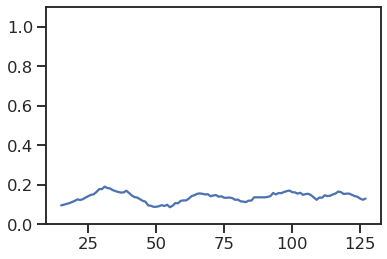

In [11]:
df["scaled_reward"].rolling(16).mean().plot(ylim=(0, 1.1))

In [15]:
df_games["search_statistics"].shape
game = df_games["search_statistics"][128]

KeyError: 128

In [16]:
game[:10]

[['5f020ff03dcbe5ede13f1b7d3165545320c40d8905222140f92e50a25f43d29d',
  [['af87f4e624e471198a93b051ed002210ba6eb2522cf4b104ec9405df65d53bdd',
    0.3333333333333333],
   ['32af5f68b9529d7e5a00fd06590039dc8e71def5ef93be1a331695380e535561',
    0.3333333333333333],
   ['5f020ff03dcbe5ede13f1b7d3165545320c40d8905222140f92e50a25f43d29d',
    0.3333333333333333]]],
 ['af87f4e624e471198a93b051ed002210ba6eb2522cf4b104ec9405df65d53bdd',
  [['ac42683fa82b5daf83a12f1775f446c0b924601c7c96bb8d694d5d049acb9a37', 0.25],
   ['80d69fd522556c00f2c98960d79a05a35b89a7c727ea4d933f48d7a6ea588b46', 0.25],
   ['5f020ff03dcbe5ede13f1b7d3165545320c40d8905222140f92e50a25f43d29d', 0.25],
   ['af87f4e624e471198a93b051ed002210ba6eb2522cf4b104ec9405df65d53bdd',
    0.25]]],
 ['af87f4e624e471198a93b051ed002210ba6eb2522cf4b104ec9405df65d53bdd',
  [['ac42683fa82b5daf83a12f1775f446c0b924601c7c96bb8d694d5d049acb9a37', 0.25],
   ['80d69fd522556c00f2c98960d79a05a35b89a7c727ea4d933f48d7a6ea588b46', 0.25],
   ['5f020ff03dcb

In [17]:
df2 = pd.read_sql(session.query(StateStore).filter_by(run_id=run_id, digest=game[0][0]).statement, session.bind)
df2

,digest,hash,run_id,state,policy_inputs
0,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-6798317064969179397,gridworld_16,b'x\x9c\xed\x9bi\x93\xdbD\x10\x86\xe5x\x13\x12...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
1,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-6798317064968096872,gridworld_16,b'x\x9c\xed\x9bi\x93\xdbD\x10\x86\xe5x\x13\x12...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
2,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-6798317064967014347,gridworld_16,b'x\x9c\xed\x9bk\x93\x13E\x14\x86\'dA\x18.\xbb...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
3,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-6798317064965931822,gridworld_16,b'x\x9c\xed\x9bk\x93\x13E\x14\x86\'dA\x18.\xbb...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
4,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-6798317064964849297,gridworld_16,b'x\x9c\xed\x9bk\x93\x13E\x14\x86\'dA\x18.\xbb...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
...,...,...,...,...,...
56,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-6798317064905310422,gridworld_16,b'x\x9c\xed\x9bk\x93\x13E\x14\x86\'dA\x18.Y\\/...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
57,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-6798317064904227897,gridworld_16,b'x\x9c\xed\x9bk\x93\x13E\x14\x86\'d\xc1e\xb8\...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
58,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-6798317064903145372,gridworld_16,b'x\x9c\xed\x9bk\x93\x13E\x14\x86\'dAv\xb8\xec...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
59,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-6798317064902062847,gridworld_16,b'x\x9c\xed\x9bk\x93\xdb4\x14\x86\x9df[Z\xf7\x...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...


In [6]:
# engine =  create_engine('sqlite:///hallway_data.db',
#                          connect_args={'check_same_thread': False},
#                          execution_options = {"isolation_level": "AUTOCOMMIT"})

# dbname = "bde"
# port = "5432"
# host = "yuma.hpc.nrel.gov"
# user = "rlops"
# passwd_file = '/projects/rlmolecule/rlops_pass'
# with open(passwd_file, 'r') as f:
#     passwd = f.read().strip()
# drivername = "postgresql+psycopg2"
# engine_str = f'{drivername}://{user}:{passwd}@{host}:{port}/{dbname}'
        
# engine = create_engine(engine_str, execution_options={"isolation_level": "AUTOCOMMIT"})

In [16]:
float(df["time"].values[-1] - df["time"].values[0])/1e9/60

5.405813266666667

# 5x5 gridworld 

In [38]:
engine = create_engine(f'sqlite:///gridworld_data.db',
                       connect_args={'check_same_thread': False},
                       execution_options = {"isolation_level": "AUTOCOMMIT"})

In [47]:
_ = plot_reward(engine, -2)

# Scratch

In [3]:
from rlmolecule.tree_search.reward import LinearBoundedRewardFactory
from rlmolecule.gym.gym_state import GymEnvState
from gridworld_env import GridWorldEnv as GridEnv
from gridworld_env import make_empty_grid
from solve_gridworld import con


ImportError: cannot import name 'GridWorldProblem' from 'gridworld_env' (/lustre/eaglefs/projects/rlmolecule/dbiagion/rlmolecule/examples/gym/gridworld_env.py)

In [8]:
grid = make_empty_grid(16)
env = GridEnv(grid, use_scalar_obs=True)
_ = env.reset()

In [9]:
e = GymEnvState(env, 0, 0, 0, False)
e.hash()

5395833287013825878

In [13]:
n = e.get_next_actions()
list(set(n))

[(array([0]), 1), (array([1]), 1), (array([16]), 1)]

In [15]:
problem = GridWorldProblem(
    env=env,
    engine=engine,
)

NameError: name 'GridWorldProblem' is not defined